# Multiple Linear Regression

### Problem Statement

    A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing 
    unit there and producing cars locally to give competition to their US and European counterparts. 
    
    They have  contracted an automobile consulting company to understand the factors on which the pricing of 
    cars depends. The company wants to know:
    
        - Which variables are significant in predicting the price of a car
        - How well those variables describe the price of a car


# Step 1:- Reading and Understanding the Data

    Let's import necessary libraries and read the dataset

In [2]:
# Avoid Warnings

import warnings 
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
car_df = pd.read_csv("CarPrice_Assignment.csv", encoding = 'latin1')

In [5]:
# let's see the header
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Let's extract the car name from "CarName" column since it has car name with model
car_df['company_name'] = car_df['CarName'].str.split().str[0].str.strip()
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
# Drop the CarName column since it is not required

car_df = car_df.drop(['CarName'],axis=1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
car_df.shape

(205, 26)

In [9]:
#Finding categorical variables and also find the null values if any exist
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [10]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2:- Data Visualization

    Let's try to see if any independent varibale is corrleate with dependent variable or is there any 
    collinearity between independent varibales

In [11]:
# let's import data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing numeric variables

Let's visualize numeric varibales using pairplot

<Figure size 720x432 with 0 Axes>

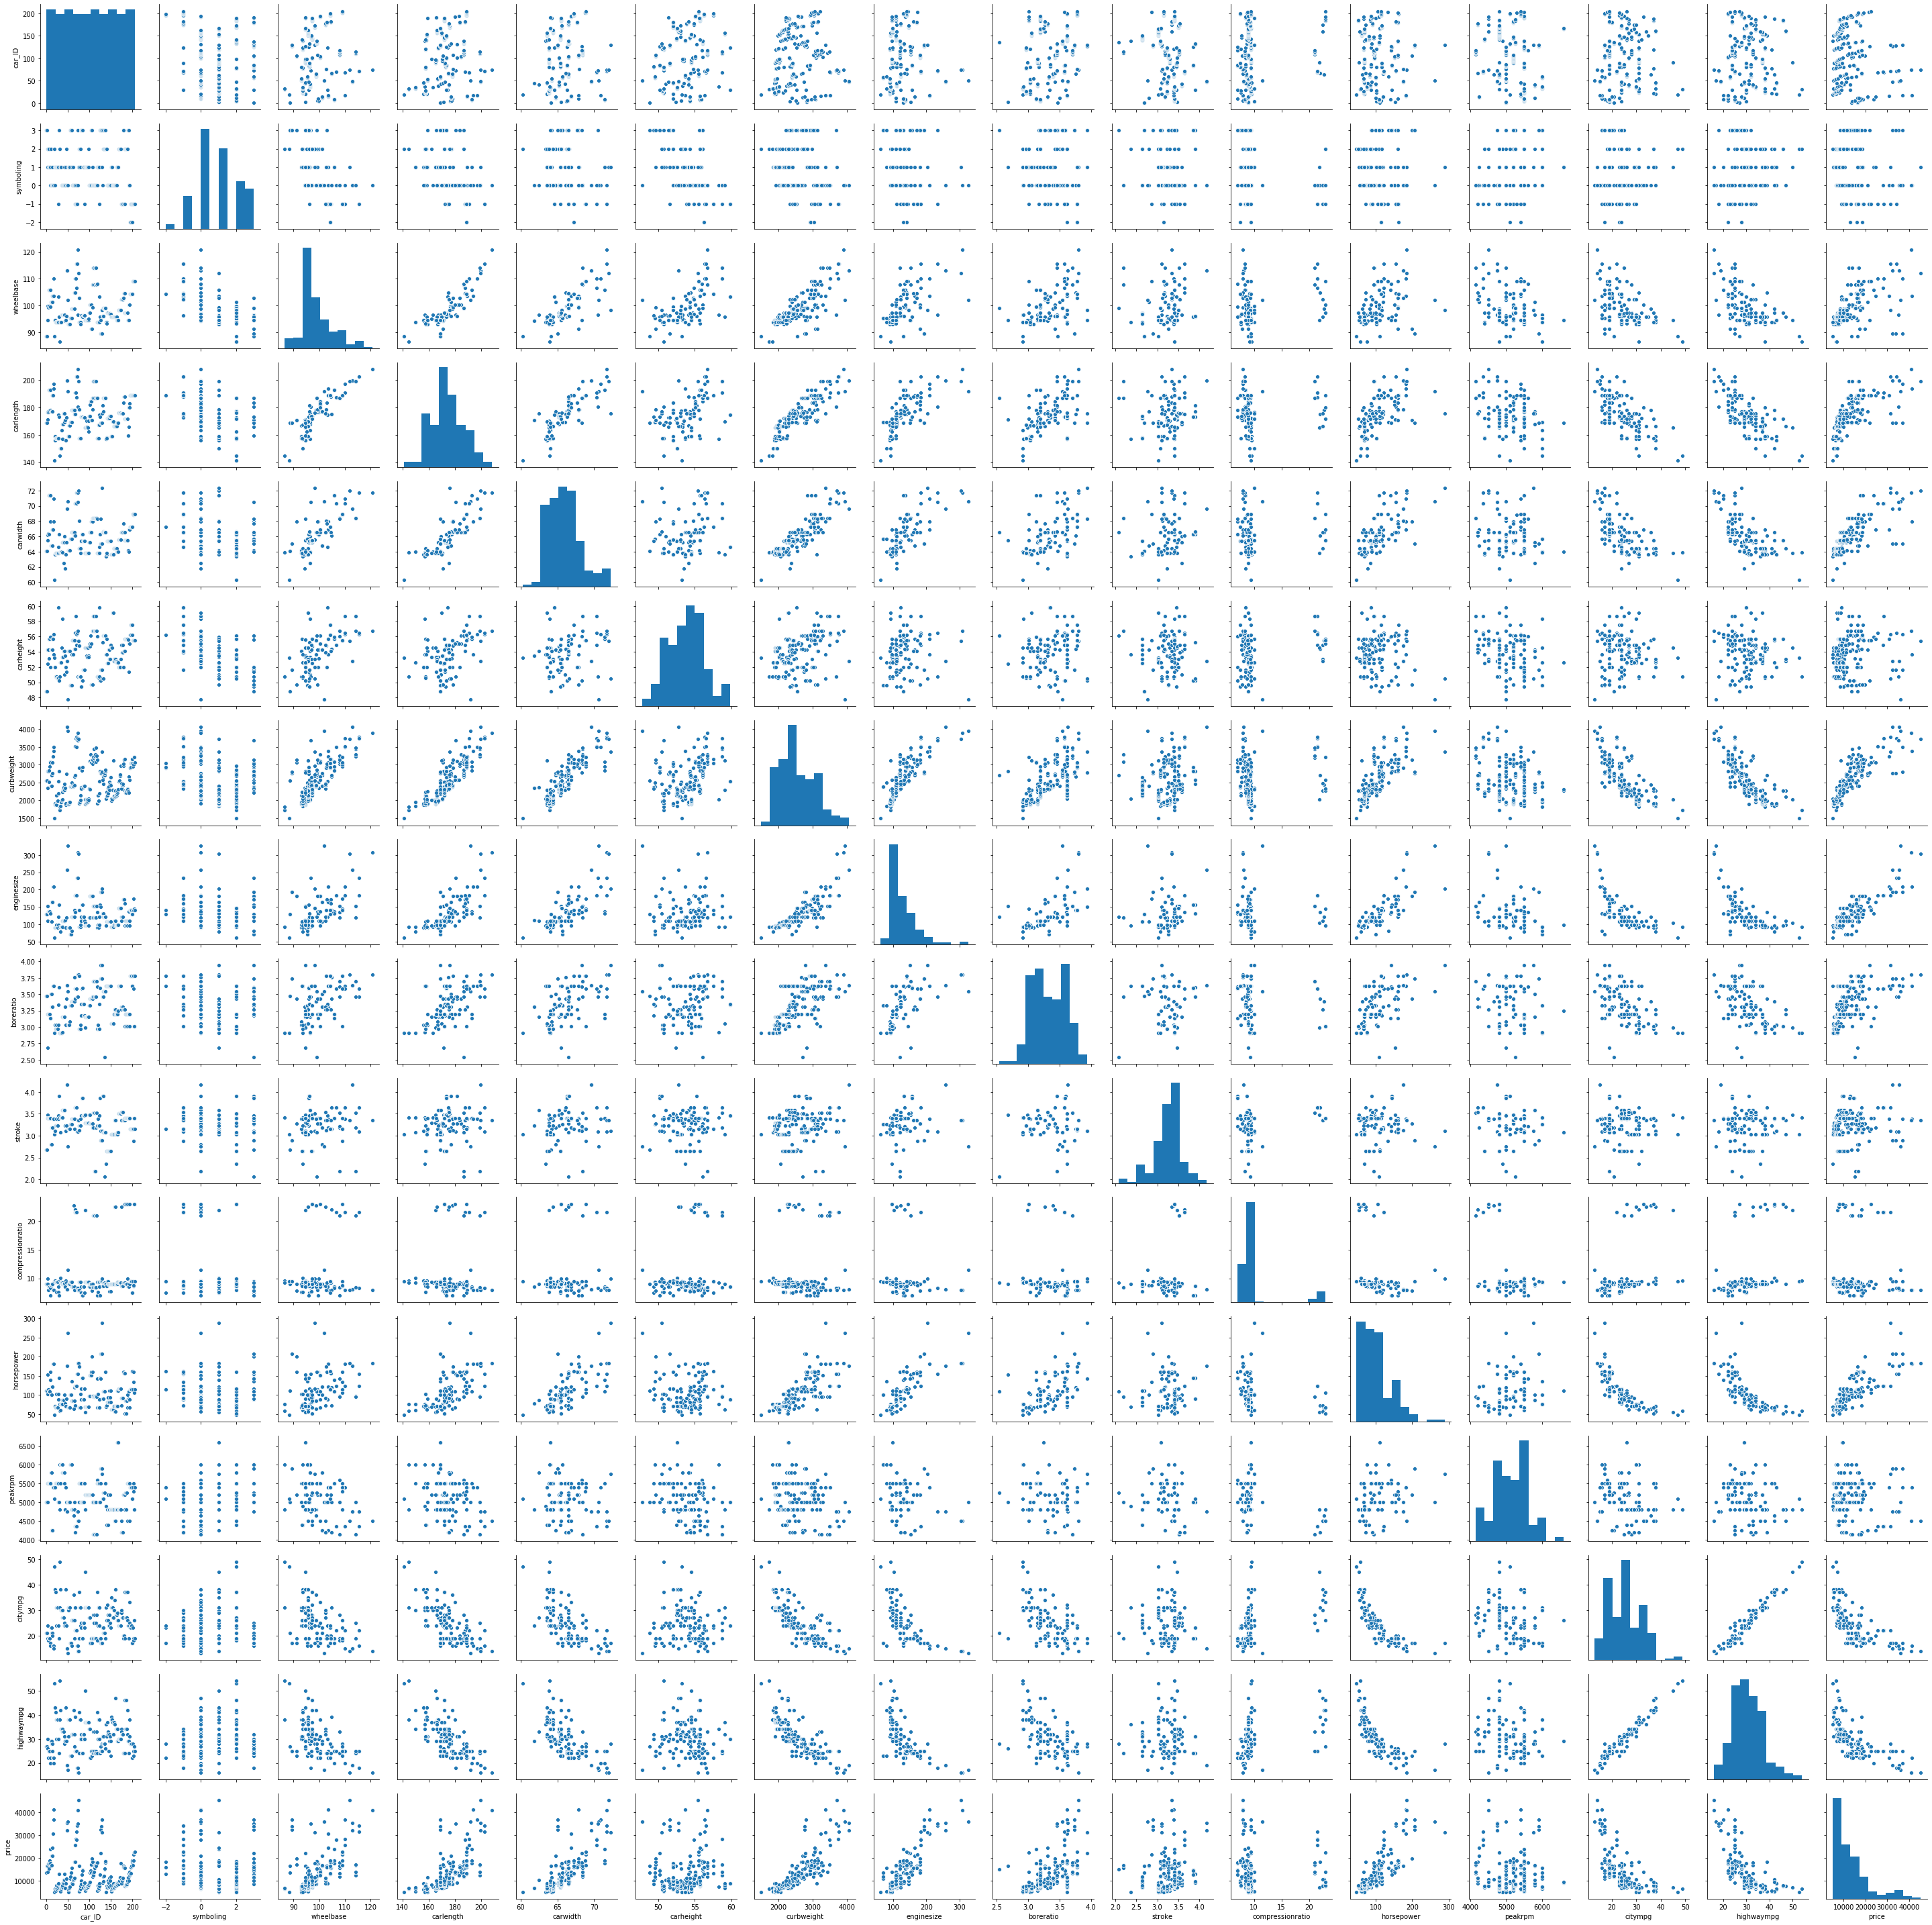

In [12]:
#Let's visulaize the numeric varibles using scatter plot
plt.figure(figsize = (10,6))
sns.pairplot(car_df)
plt.show()

#### Visualizing categorical variables

Let's visualize categorical varibales using boxplot

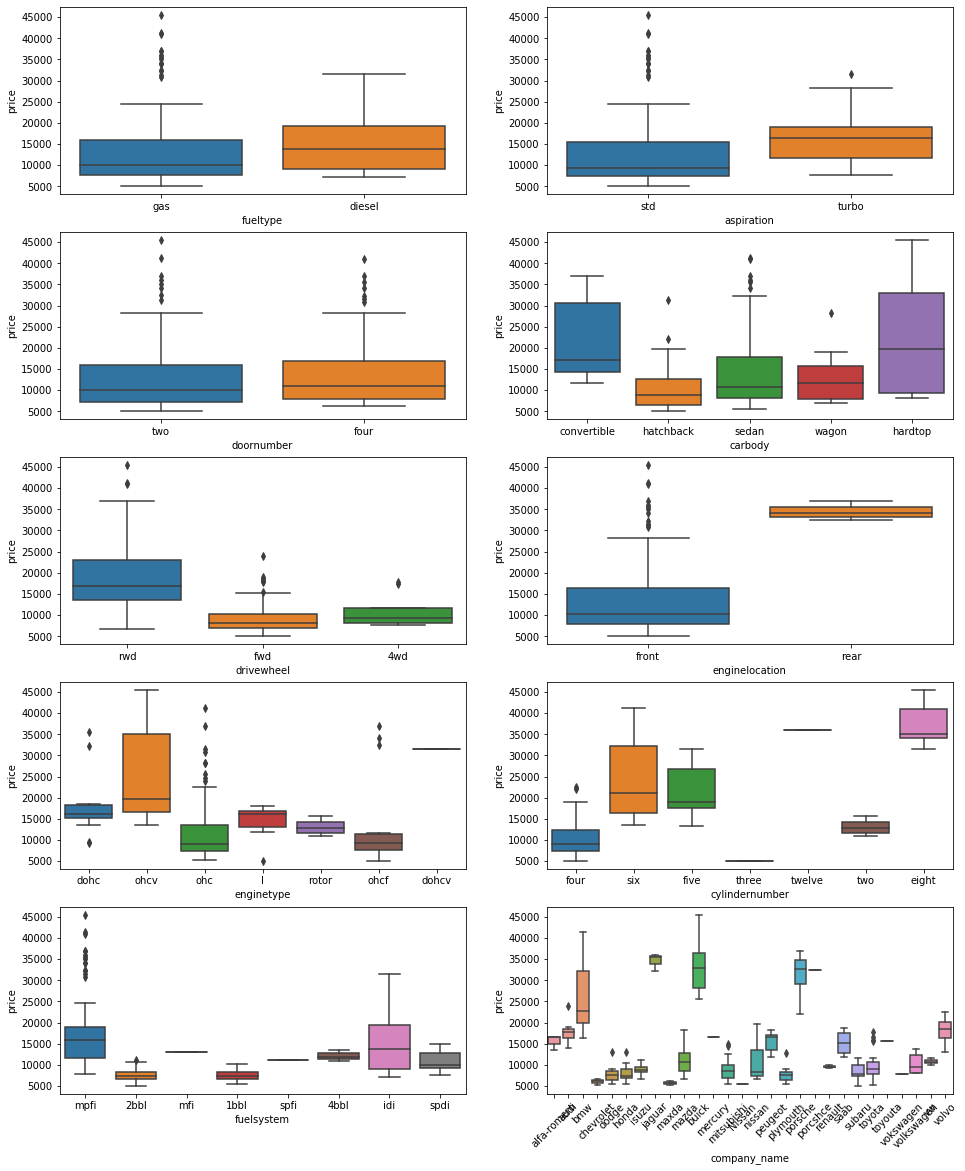

In [13]:
#Let's visualize the categorical varibles

plt.figure(figsize = (16,20))
plt.subplot(5,2,1)
sns.boxplot(x='fueltype',y='price',data=car_df)
plt.subplot(5,2,2)
sns.boxplot(x='aspiration',y='price',data=car_df)
plt.subplot(5,2,3)
sns.boxplot(x='doornumber',y='price',data=car_df)
plt.subplot(5,2,4)
sns.boxplot(x='carbody',y='price',data=car_df)
plt.subplot(5,2,5)
sns.boxplot(x='drivewheel',y='price',data=car_df)
plt.subplot(5,2,6)
sns.boxplot(x='enginelocation',y='price',data=car_df)
plt.subplot(5,2,7)
sns.boxplot(x='enginetype',y='price',data=car_df)
plt.subplot(5,2,8)
sns.boxplot(x='cylindernumber',y='price',data=car_df)
plt.subplot(5,2,9)
sns.boxplot(x='fuelsystem',y='price',data=car_df)
plt.subplot(5,2,10)
sns.boxplot(x='company_name',y='price',data=car_df)
plt.xticks(rotation=45)

plt.show()


# Step 3:- Data Preparation

It is time to convert the categorical varibales to numeric values

In [14]:
print(car_df.fueltype.value_counts())
print(car_df.doornumber.value_counts())
print(car_df.aspiration.value_counts())
print(car_df.carbody.value_counts())
print(car_df.drivewheel.value_counts())
print(car_df.enginelocation.value_counts())
print(car_df.enginetype.value_counts())
print(car_df.cylindernumber.value_counts())
print(car_df.fuelsystem.value_counts())
print(car_df.company_name.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             

#### Let's assign dummy varibales for the above categorical varibales

Before assigning dummy varibales, we can clearly see there are some company names are repeating multiple times with different names also we see there are some with lower case and some are with upper case. Let's correct all of these.

In [15]:
#Convert the company name column to lower case

car_df['company_name'] = car_df['company_name'].str.lower()

In [16]:
#correct the company name spellings

car_df ['company_name'] = car_df ['company_name'].replace({'toyouta' : 'toyota', 'maxda': 'mazda',
                                                           'porcshce': 'porsche','vokswagen':'volkswagen', 
                                                           'vw':'volkswagen'})
                                                           
car_df.company_name.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: company_name, dtype: int64

In [17]:
#let's first convert fueltype, doornumber, aspiration and enginelocation with label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
car_df ['fueltype'] = le.fit_transform(car_df['fueltype'])
car_df ['doornumber'] = le.fit_transform(car_df['doornumber'])
car_df ['aspiration'] = le.fit_transform(car_df['aspiration'])
car_df ['enginelocation'] = le.fit_transform(car_df['enginelocation'])

print(car_df.fueltype.value_counts())
print(car_df.doornumber.value_counts())
print(car_df.aspiration.value_counts())
print(car_df.enginelocation.value_counts())

1    185
0     20
Name: fueltype, dtype: int64
0    115
1     90
Name: doornumber, dtype: int64
0    168
1     37
Name: aspiration, dtype: int64
0    202
1      3
Name: enginelocation, dtype: int64


In [18]:
#let's now convert remaining categorical varibales to numeric values using get dummies

dummies = pd.get_dummies(car_df[['carbody','drivewheel','enginetype','cylindernumber','fuelsystem','company_name']],drop_first=True)
dummies.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,...,company_name_nissan,company_name_peugeot,company_name_plymouth,company_name_porsche,company_name_renault,company_name_saab,company_name_subaru,company_name_toyota,company_name_volkswagen,company_name_volvo
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Let's concat dummies dataframe with original dataframe and drop the original columns

car_df = pd.concat([car_df, dummies], axis = 1)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,company_name_nissan,company_name_peugeot,company_name_plymouth,company_name_porsche,company_name_renault,company_name_saab,company_name_subaru,company_name_toyota,company_name_volkswagen,company_name_volvo
0,1,3,1,0,1,convertible,rwd,0,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,0,1,convertible,rwd,0,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,1,hatchback,rwd,0,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,0,0,sedan,fwd,0,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,0,0,sedan,4wd,0,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Let's drop the original columns since they are already converted to numeric values.
# Also let's drop Car_ID column since it is just a serial number.
car_df.drop(['car_ID','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','company_name'], axis = 1, inplace = True)
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,company_name_nissan,company_name_peugeot,company_name_plymouth,company_name_porsche,company_name_renault,company_name_saab,company_name_subaru,company_name_toyota,company_name_volkswagen,company_name_volvo
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


# Step 4:- Splitting the data into Train and Test sets

Let's split the dataset into train and test sets

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_df, train_size=0.7,test_size=0.3, random_state=100)
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,company_name_nissan,company_name_peugeot,company_name_plymouth,company_name_porsche,company_name_renault,company_name_saab,company_name_subaru,company_name_toyota,company_name_volkswagen,company_name_volvo
122,1,1,0,0,0,93.7,167.3,63.8,50.8,2191,...,0,0,1,0,0,0,0,0,0,0
125,3,1,0,1,0,94.5,168.9,68.3,50.2,2778,...,0,0,0,1,0,0,0,0,0,0
166,1,1,0,1,0,94.5,168.7,64.0,52.6,2300,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,1,0,0,104.3,188.8,67.2,57.5,3157,...,0,0,0,0,0,0,0,0,0,1


In [22]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,company_name_nissan,company_name_peugeot,company_name_plymouth,company_name_porsche,company_name_renault,company_name_saab,company_name_subaru,company_name_toyota,company_name_volkswagen,company_name_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.909091,0.181818,0.440559,0.006993,98.523077,173.416783,65.839860,53.551748,2539.510490,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.195999,0.288490,0.387050,0.498199,0.083624,5.961835,12.598122,2.214203,2.433766,544.650539,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,115.600000,202.600000,72.300000,59.100000,4066.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Let's Rescale the features

Here the features are in different range so it would be better to rescale to get the better model

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Let's apply MinMaxScaler to the columns except the dummy varibales
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,company_name_nissan,company_name_peugeot,company_name_plymouth,company_name_porsche,company_name_renault,company_name_saab,company_name_subaru,company_name_toyota,company_name_volkswagen,company_name_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.909091,0.181818,0.440559,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.195999,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


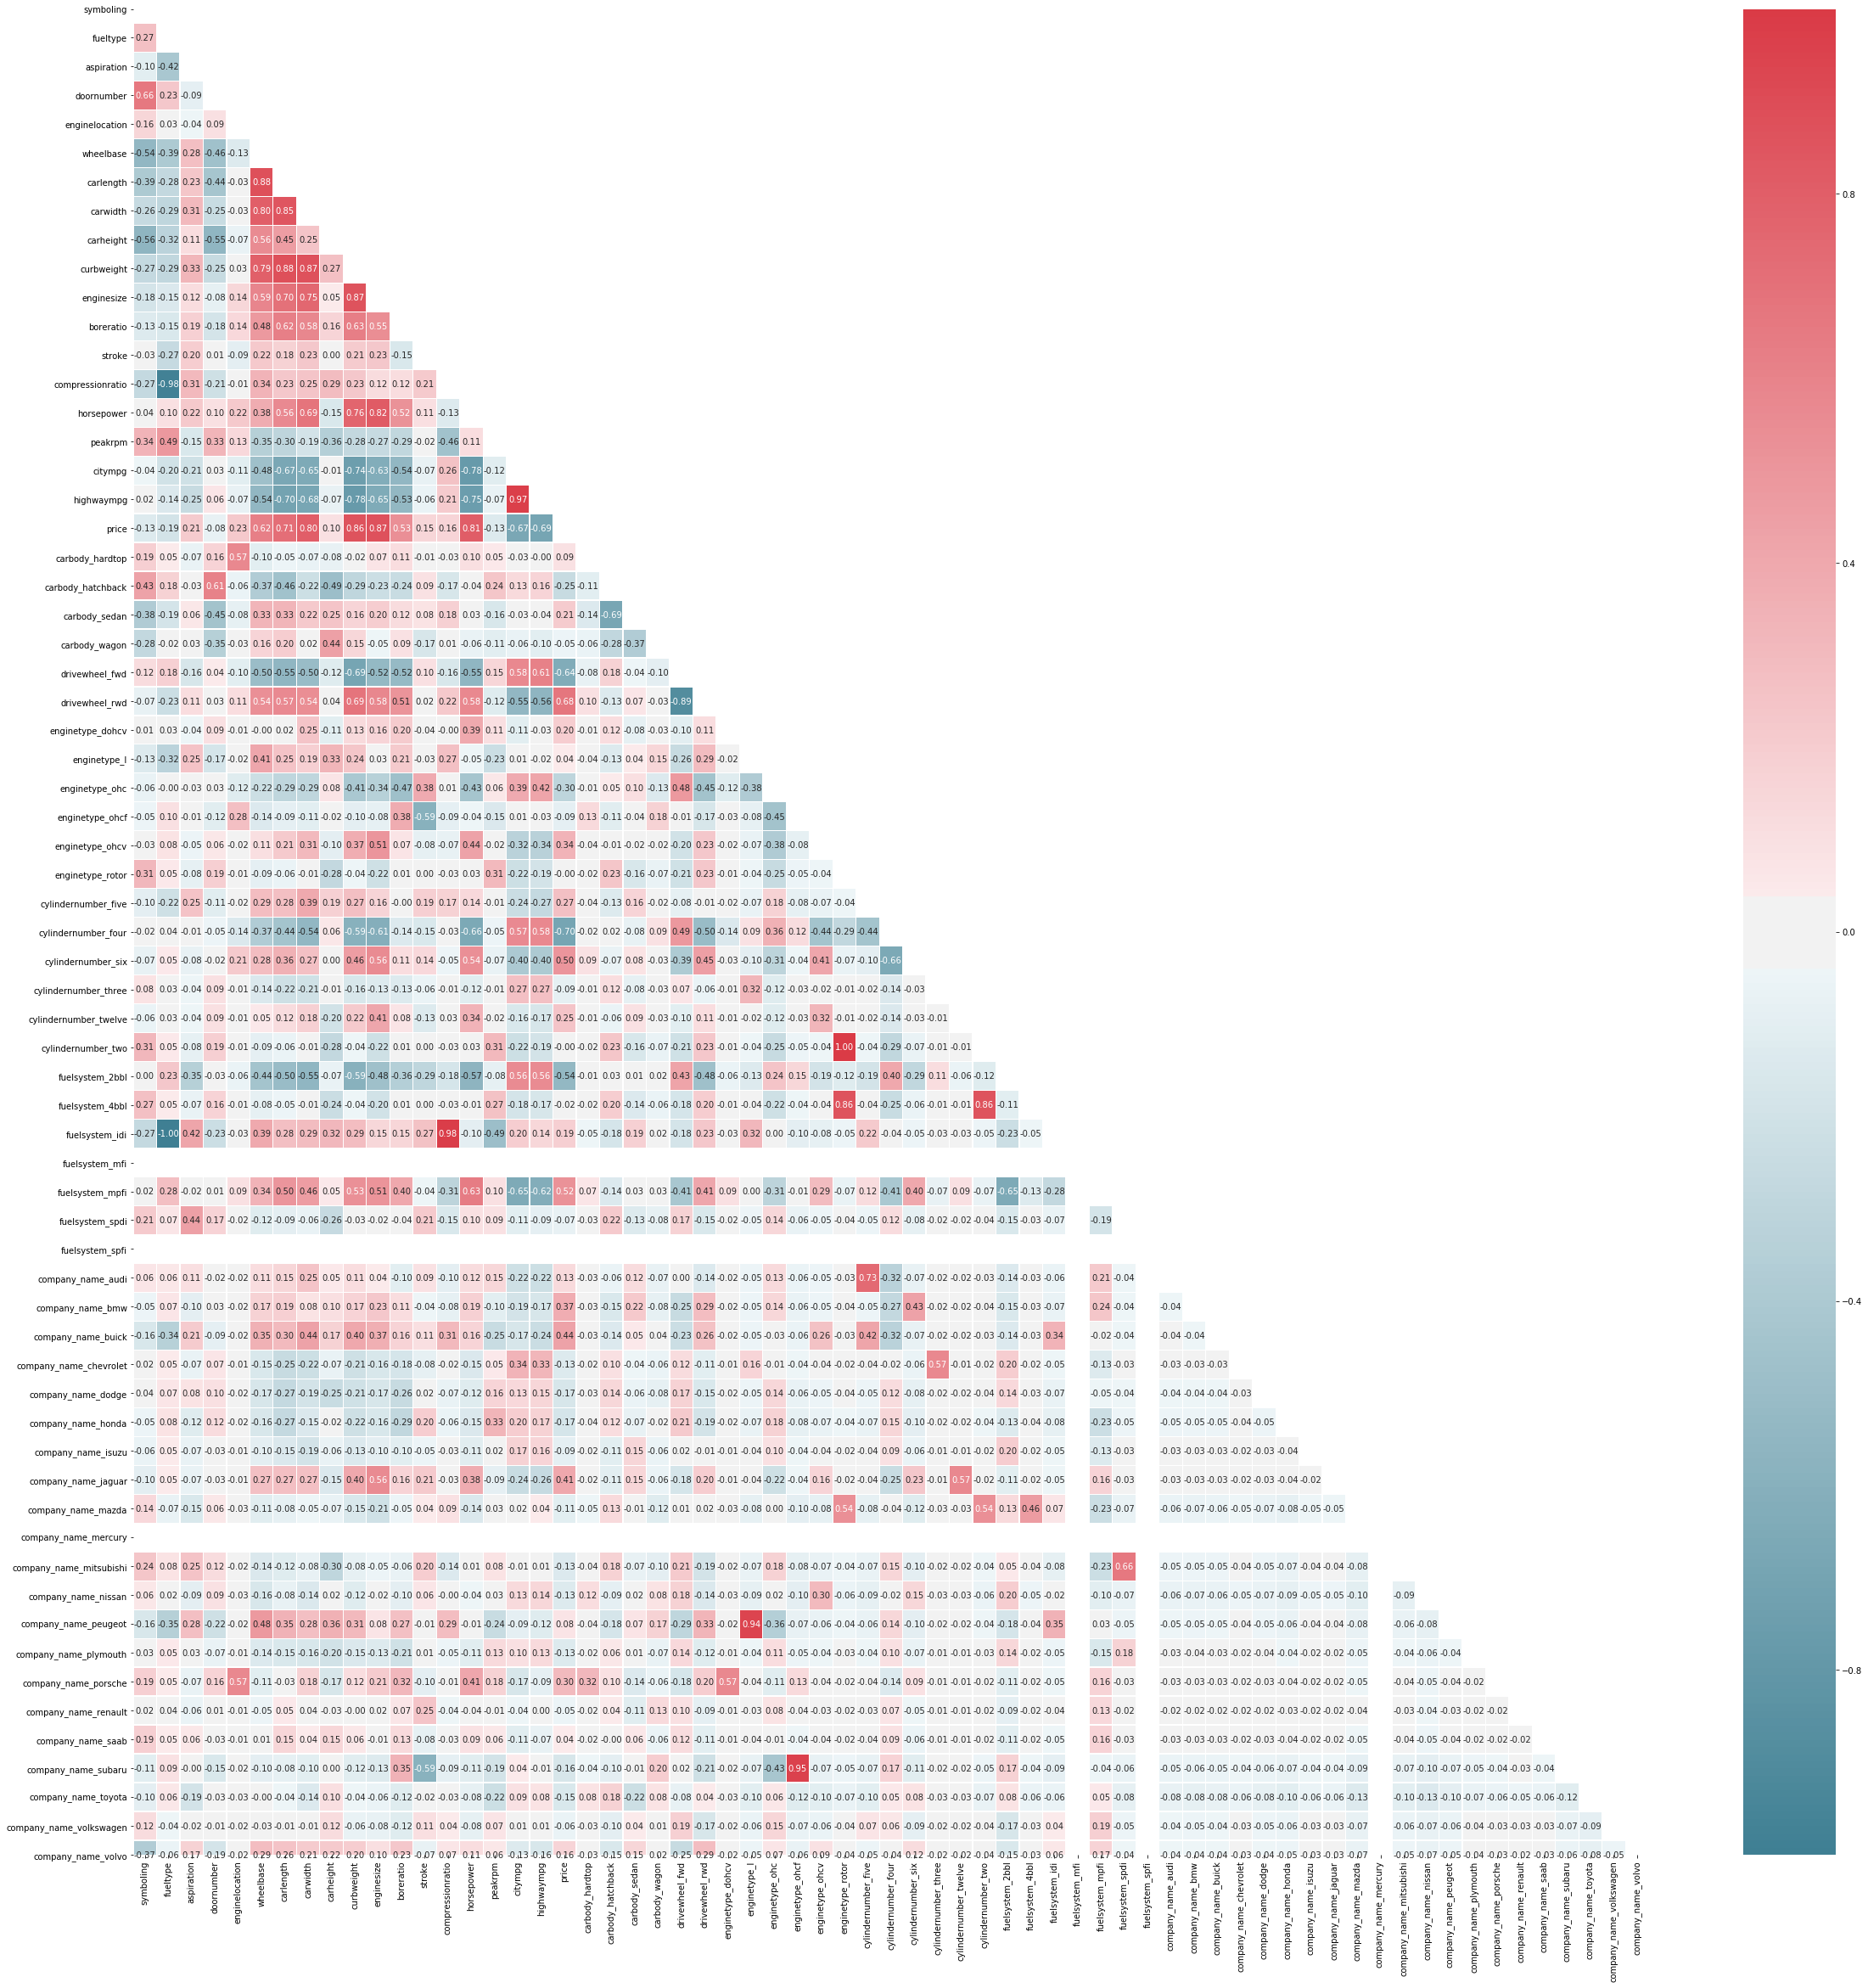

In [31]:
#Let's see the correlation among the varibales now

corr = df_train.corr()
fig, ax = plt.subplots(figsize=(40,40))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,cmap = colormap, linewidth=0.2, annot=True,fmt=".2f", mask=dropSelf)

plt.show()

#### Dividing into X and y sets for model building

In [32]:
y_train = df_train.pop('price')
X_train = df_train

# Step 5:- Building our Model

Let's build our model with Recursive Feature Elimination 

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 40),
 ('fueltype', False, 20),
 ('aspiration', False, 9),
 ('doornumber', False, 37),
 ('enginelocation', True, 1),
 ('wheelbase', False, 12),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 21),
 ('horsepower', False, 10),
 ('peakrpm', False, 11),
 ('citympg', False, 30),
 ('highwaympg', False, 22),
 ('carbody_hardtop', False, 26),
 ('carbody_hatchback', False, 25),
 ('carbody_sedan', False, 27),
 ('carbody_wagon', False, 28),
 ('drivewheel_fwd', False, 47),
 ('drivewheel_rwd', False, 35),
 ('enginetype_dohcv', False, 7),
 ('enginetype_l', False, 2),
 ('enginetype_ohc', False, 50),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 32),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 24),
 ('cylindernumber_three', T

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'company_name_bmw', 'company_name_peugeot',
       'company_name_porsche'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_name_audi', 'company_name_buick', 'company_name_chevrolet',
       'company_name_dodge', 'company_name_honda', 'company_name_isuzu',
       'company_name_jaguar', 'company_name_mazda', 'company_name_mercury',
       'company_name_mitsubishi', 'company_name_nissan',
       'company_name_plymouth', 'company_name_renault', 'company_name_saab',
       'company_name_subaru', 'company_name_toyota', 'company_name_v

### Building model with statsmodel

In [38]:
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [41]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.03e-70
Time:                        12:43:07   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

Here p value is significant for all the selected features. So let's check VFI befored ropping any feature which is not significant

### Checking VFI

In [42]:
X_train_rfe.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'company_name_bmw', 'company_name_peugeot',
       'company_name_porsche'],
      dtype='object')

In [43]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
X_train_new.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'company_name_bmw', 'company_name_peugeot',
       'company_name_porsche'],
      dtype='object')

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
3,enginesize,80.71
2,curbweight,54.10
1,carwidth,41.15
4,boreratio,34.56
5,stroke,30.89
8,cylindernumber_four,24.19
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.67


### Correlation matrix for the 10 features drwan from RFE

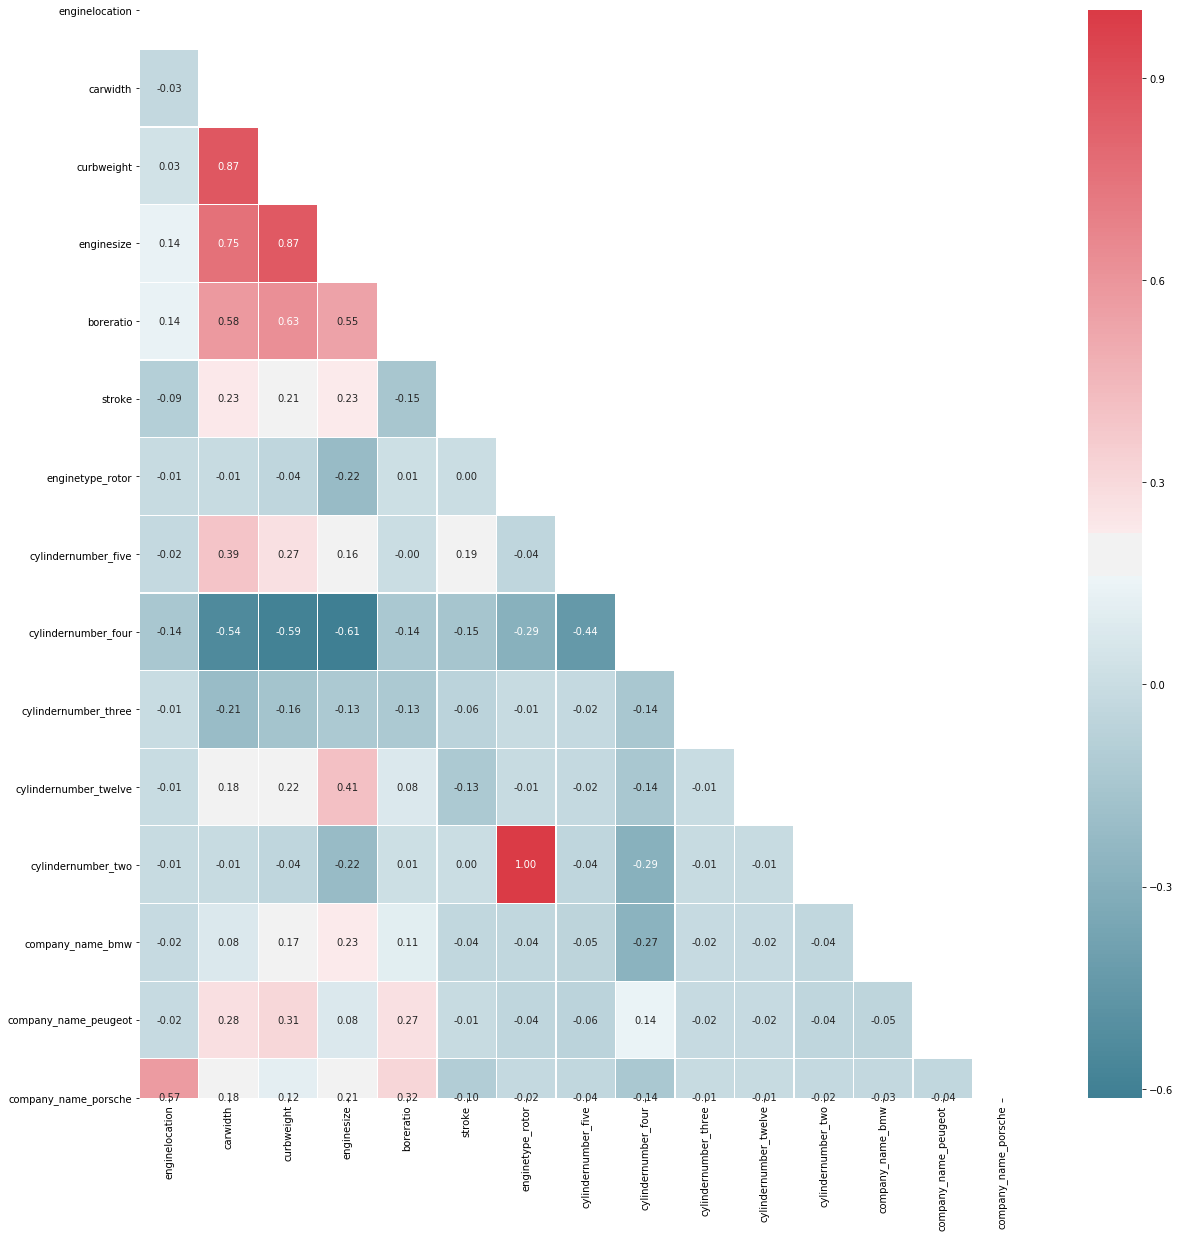

In [47]:
corr = X_train_new.corr()
fig, ax = plt.subplots(figsize=(20,20))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,cmap = colormap, linewidth=0.2, annot=True,fmt=".2f", mask=dropSelf)

plt.show()


### Dropping the varibales and updating the model

The feature `cylindernumber_two` is highly correlated with `enginetype_rotor`, so let's drop one feature `cylindernumber_two` and rebuild the model

In [48]:
X = X_train_new.drop('cylindernumber_two', 1,)
X.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'company_name_bmw', 'company_name_peugeot', 'company_name_porsche'],
      dtype='object')

In [49]:
# Adding a constant
X_train_lm2 = sm.add_constant(X)

# Running the linear model again
lm_2 = sm.OLS(y_train,X_train_lm2).fit() 

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.03e-70
Time:                        13:05:10   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [50]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,80.71
2,curbweight,54.10
1,carwidth,41.15
4,boreratio,34.56
5,stroke,30.89
8,cylindernumber_four,24.19
6,enginetype_rotor,3.95
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.67
13,company_name_porsche,1.93


Let's drop the feature `enginesize` since these are highly correlated with `curbweight`.

In [58]:
X1 = X.drop('enginesize',1)
X1.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'company_name_bmw',
       'company_name_peugeot', 'company_name_porsche'],
      dtype='object')

In [59]:
# Adding a constant
X_train_lm3 = sm.add_constant(X1)

# Running the linear model again
lm_3 = sm.OLS(y_train,X_train_lm3).fit() 

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           5.01e-61
Time:                        13:11:25   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [60]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,40.31
1,carwidth,39.80
3,boreratio,22.51
4,stroke,16.12
7,cylindernumber_four,10.07
12,company_name_porsche,1.92
6,cylindernumber_five,1.70
0,enginelocation,1.62
11,company_name_peugeot,1.42
5,enginetype_rotor,1.37


Let's drop the feature `cylindernumber_four` since it has not a significant p value though it has VIF less than `curbweight`

In [61]:
X2 = X1.drop('cylindernumber_four', 1,)
X2.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_three',
       'cylindernumber_twelve', 'company_name_bmw', 'company_name_peugeot',
       'company_name_porsche'],
      dtype='object')

In [62]:
# Adding a constant
X_train_lm4 = sm.add_constant(X2)

# Running the linear model again
lm_4 = sm.OLS(y_train,X_train_lm4).fit() 

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.72e-62
Time:                        13:24:41   Log-Likelihood:                 189.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     130   BIC:                            -314.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [63]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,39.28
2,curbweight,23.48
3,boreratio,11.34
4,stroke,8.01
11,company_name_porsche,1.80
0,enginelocation,1.61
6,cylindernumber_five,1.49
10,company_name_peugeot,1.28
8,cylindernumber_twelve,1.16
9,company_name_bmw,1.13


Let's drop the feature `cylindernumber_five` since it has not a significant p value though it has low VIF comapred to others.

In [64]:
X3 = X2.drop('cylindernumber_five', 1,)
X3.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve',
       'company_name_bmw', 'company_name_peugeot', 'company_name_porsche'],
      dtype='object')

In [65]:
# Adding a constant
X_train_lm5 = sm.add_constant(X3)

# Running the linear model again
lm_5 = sm.OLS(y_train,X_train_lm5).fit() 

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.37e-63
Time:                        13:27:50   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [66]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,33.96
2,curbweight,23.47
3,boreratio,9.90
4,stroke,7.65
10,company_name_porsche,1.77
0,enginelocation,1.60
9,company_name_peugeot,1.24
7,cylindernumber_twelve,1.13
8,company_name_bmw,1.12
5,enginetype_rotor,1.04


Let's drop the feature `stroke` since it has high p value and also VIF more then 10.

In [67]:
X4 = X3.drop('stroke', 1,)
X4.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'boreratio',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve',
       'company_name_bmw', 'company_name_peugeot', 'company_name_porsche'],
      dtype='object')

In [68]:
# Adding a constant
X_train_lm6 = sm.add_constant(X4)

# Running the linear model again
lm_6 = sm.OLS(y_train,X_train_lm6).fit() 

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.72e-64
Time:                        13:28:56   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [69]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,25.35
2,curbweight,23.19
3,boreratio,9.79
9,company_name_porsche,1.64
0,enginelocation,1.57
8,company_name_peugeot,1.18
7,company_name_bmw,1.12
6,cylindernumber_twelve,1.07
4,enginetype_rotor,1.04
5,cylindernumber_three,1.01


Let's drop feature `enginetype_rotor` since it has high p value though it has low VIF.

In [70]:
X5 = X4.drop('enginetype_rotor', 1,)
X5.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'boreratio',
       'cylindernumber_three', 'cylindernumber_twelve', 'company_name_bmw',
       'company_name_peugeot', 'company_name_porsche'],
      dtype='object')

In [71]:
# Adding a constant
X_train_lm7 = sm.add_constant(X5)

# Running the linear model again
lm_7 = sm.OLS(y_train,X_train_lm7).fit() 

print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.09e-64
Time:                        13:30:48   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [72]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,25.25
2,curbweight,23.05
3,boreratio,9.73
8,company_name_porsche,1.64
0,enginelocation,1.57
7,company_name_peugeot,1.18
6,company_name_bmw,1.12
5,cylindernumber_twelve,1.07
4,cylindernumber_three,1.01


By this stage all features have significant p values. But VIF is more for `carwidth`. So let's drop this.

In [73]:
X6 = X5.drop('carwidth', 1,)
X6.columns

Index(['enginelocation', 'curbweight', 'boreratio', 'cylindernumber_three',
       'cylindernumber_twelve', 'company_name_bmw', 'company_name_peugeot',
       'company_name_porsche'],
      dtype='object')

In [74]:
# Adding a constant
X_train_lm8 = sm.add_constant(X6)

# Running the linear model again
lm_8 = sm.OLS(y_train,X_train_lm8).fit() 

print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           5.28e-60
Time:                        13:36:43   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

In [75]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,8.38
2,boreratio,8.18
7,company_name_porsche,1.61
0,enginelocation,1.50
6,company_name_peugeot,1.16
5,company_name_bmw,1.09
4,cylindernumber_twelve,1.07
3,cylindernumber_three,1.01


Here `boreratio` has high p value and high VIF. So let's drop `boreratio`

In [76]:
X7 = X6.drop('boreratio', 1,)
X7.columns

Index(['enginelocation', 'curbweight', 'cylindernumber_three',
       'cylindernumber_twelve', 'company_name_bmw', 'company_name_peugeot',
       'company_name_porsche'],
      dtype='object')

In [77]:
# Adding a constant
X_train_lm9 = sm.add_constant(X7)

# Running the linear model again
lm_9 = sm.OLS(y_train,X_train_lm9).fit() 

print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.97e-60
Time:                        13:39:47   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

In [78]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,company_name_porsche,1.55
0,enginelocation,1.50
1,curbweight,1.33
5,company_name_peugeot,1.16
4,company_name_bmw,1.09
3,cylindernumber_twelve,1.04
2,cylindernumber_three,1.00


Here feature `cylindernumber_three` has high p value though it has low VIF. Let's drop it.

In [79]:
X8 = X7.drop('cylindernumber_three', 1,)
X8.columns

Index(['enginelocation', 'curbweight', 'cylindernumber_twelve',
       'company_name_bmw', 'company_name_peugeot', 'company_name_porsche'],
      dtype='object')

In [80]:
# Adding a constant
X_train_lm10 = sm.add_constant(X8)

# Running the linear model again
lm_10 = sm.OLS(y_train,X_train_lm10).fit() 

print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           8.77e-61
Time:                        13:42:31   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

In [81]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,company_name_porsche,1.55
0,enginelocation,1.50
1,curbweight,1.33
4,company_name_peugeot,1.16
3,company_name_bmw,1.09
2,cylindernumber_twelve,1.04


For lm10, we can see that p value and VIF are significantly low for all features. So, let's stop buliding the model.

# Step 6:-  Residual analysis for the training data

Now, let's check if the error terms are also normally distributed. Let's plot the histogram of the error terms.

In [83]:
X_train_lm10.shape

(143, 7)

In [84]:
y_train_price = lm_10.predict(X_train_lm10)

In [85]:
y_train_price.head()

122    0.093792
125    0.498842
166    0.129996
1      0.212368
199    0.414645
dtype: float64

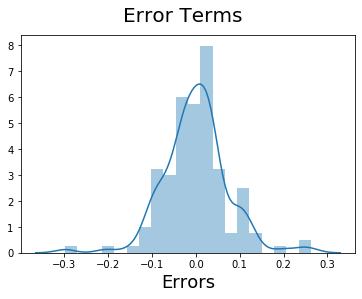

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

# Step 7:- Making Predictions using final model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

#### Apply the scaling on test sets

In [87]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,company_name_nissan,company_name_peugeot,company_name_plymouth,company_name_porsche,company_name_renault,company_name_saab,company_name_subaru,company_name_toyota,company_name_volkswagen,company_name_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.887097,0.177419,0.435484,0.032258,0.370121,0.486741,0.375212,0.454249,0.371743,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.358620,0.319058,0.385142,0.499868,0.178127,0.179970,0.183964,0.208977,0.234487,0.222354,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.265306,0.389764,0.221053,0.264423,0.219125,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.327988,0.475591,0.326316,0.485577,0.344065,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,0.482507,0.642126,0.421053,0.605769,0.540726,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Let's divide into X_test and y_test

In [88]:
y_test = df_test.pop('price')
X_test = df_test

In [89]:
# Creating X_test_lm10 dataframe by dropping variables from X_test_lm10

X_test_lm10 = X_test[X8.columns]
X_test_lm10.head()

,enginelocation,curbweight,cylindernumber_twelve,company_name_bmw,company_name_peugeot,company_name_porsche
160,0,0.132148,0,0,0,0
186,0,0.219125,0,0,0,0
59,0,0.271985,0,0,0,0
165,0,0.214320,0,0,0,0
140,0,0.202307,0,0,0,0


In [90]:
# Adding constant variable to test dataframe
X_test_lm10 = sm.add_constant(X_test_lm10)

In [91]:
X_test_lm10.head()

,const,enginelocation,curbweight,cylindernumber_twelve,company_name_bmw,company_name_peugeot,company_name_porsche
160,1.0,0,0.132148,0,0,0,0
186,1.0,0,0.219125,0,0,0,0
59,1.0,0,0.271985,0,0,0,0
165,1.0,0,0.214320,0,0,0,0
140,1.0,0,0.202307,0,0,0,0


In [92]:
# Making predictions using the final model

y_pred_lm10 = lm_10.predict(X_test_lm10)
y_pred_lm10.head()

160   -0.026551
186    0.047925
59     0.093187
165    0.043810
140    0.033523
dtype: float64

### Finding the R^2 for the test set

In [93]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm10)

0.8060376216194985

# Step 8:- Model Evolution

Let's plot scatter plot to see the distribution between actual and predicted

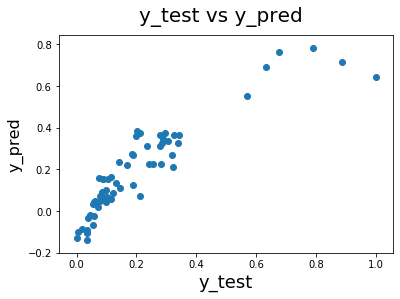

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm10)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()



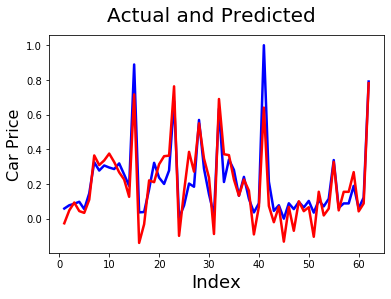

In [95]:
# Actual vs Predicted
x = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(x,y_test, color="blue", linewidth=2.5, linestyle="-")  
plt.plot(x,y_pred_lm10, color="red",  linewidth=2.5, linestyle="-")  
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                              
plt.ylabel('Car Price', fontsize=16)   
plt.show()

We can see that the equation of our best fitted line is:

$ price = -0.1397 + 0.3072  \times  enginelocation + 0.8563  \times  curbweight +  0.1751  \times cylindernumber twelve  + 0.2492  \times company name bmw - 0.1515 \times company name peugeot  +  0.2101 \times company name porsche $

##### Conclusion :- The automobile consulting company can conclude that car price may depend on below factors in USA.

   - `Engine Location`
   - `Curb Weight`
   - `Cylindernumber Twelve`
   - `Company BMW`
   - `Company Peugoet`
   - `Company Porsche`